In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot.csv")

# Select the columns you want to analyze
# For example, if you want to check the correlation of column 'A' with other columns:
selected_columns = ['original_shape_Elongation', 'original_shape_Flatness']

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Optionally, you can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd

# Load the first CSV file into a DataFrame
df1 = pd.read_csv("/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot_1mm.csv")
# Load the second CSV file into another DataFrame
df2 = pd.read_csv("/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot_3mm.csv")

# Select the columns you want to compare from each DataFrame
column1 = df1['original_firstorder_Range']
column2 = df2['original_firstorder_Range']

# Calculate the correlation coefficient between the two columns
correlation_coefficient = column1.corr(column2)

# Print the correlation coefficient
print("Correlation Coefficient:", correlation_coefficient)


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load radiomics features data into a pandas DataFrame
# # Replace this with your actual radiomics features data
# radiomics_data = pd.read_csv("/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot.csv")
# radiomics_feature = radiomics_data.iloc[:, 38:-1]
# # Calculate correlation matrix
# correlation_matrix = radiomics_feature.corr()

# # Plot correlation matrix as a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Radiomics Features')
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

# Load radiomics features data into a pandas DataFrame
radiomics_data = pd.read_csv("/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot.csv")
radiomics_feature = radiomics_data.iloc[:, 38:-1]

# Calculate correlation matrix
correlation_matrix = radiomics_feature.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Radiomics Features')
plt.show()

# Perform hierarchical clustering
linkage = hierarchy.linkage(correlation_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(linkage, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f

# Load the two datasets
data1 = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot_3mm.csv', index_col = 'Unnamed: 0')
data2 = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot.csv', index_col = 'Unnamed: 0')

# Merge datasets based on student IDs
merged_data = pd.merge(data1, data2, on='PatientID')

# Get the list of columns to remove
columns_to_remove = [col for col in merged_data.columns if col.startswith('diagnostics')]

# Drop the columns
merged_data = merged_data.drop(columns=columns_to_remove)

# Get column names
column_names = merged_data.columns
column_names

In [ ]:


import pandas as pd
import numpy as np
from scipy.stats import f

# Load the two datasets
data1 = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot_3mm.csv', index_col = 'Unnamed: 0')
data2 = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot.csv', index_col = 'Unnamed: 0')

# Merge datasets based on student IDs
merged_data = pd.merge(data1, data2, on='PatientID')

# Get the list of columns to remove
columns_to_remove = [col for col in merged_data.columns if col.startswith('diagnostics')]

# Drop the columns
merged_data = merged_data.drop(columns=columns_to_remove)

# Get column names
column_names = merged_data.columns



# Create a dictionary to store ICC results
icc_results = {}

# Loop over each column
for column in column_names:
    if column.endswith('_x'):  # Assuming column names end with '_x' after merge
        # Extract values from both datasets
        values1 = merged_data[column]
        column_y = column[:-2] + '_y'  # Get corresponding column name from second dataset
        values2 = merged_data[column_y]
        
        # Calculate ICC only if there's variation in the data
        if np.var(values1) > 0 and np.var(values2) > 0:
            # Calculate ICC
            num_subjects = len(merged_data)
            mean_ratings = (values1 + values2) / 2
            df_ratings = num_subjects - 1
            df_subjects = 1
            ms_r = np.mean((values1 - values2)**2)
            ms_e = np.mean((values1 - mean_ratings)**2 + (values2 - mean_ratings)**2) / 2
            icc = (ms_r - ms_e) / (ms_r + (num_subjects - 1) * ms_e)

            # Store ICC result
            icc_results[column] = icc
        else:
            print(f"Ignoring column '{column}' due to no variation in the data.")

# Print ICC results for each column
for column, icc in icc_results.items():
    print(f"ICC for column '{column}': {icc}")








In [56]:
import pandas as pd
import numpy as np

# Load the two datasets
data_3mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot.csv', index_col = 'Unnamed: 0')
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot_1mm.csv', index_col = 'Unnamed: 0')

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_3mm, data_0mm, on='PatientID')

# Get the list of columns to remove (assuming these are metadata columns)
columns_to_remove = [col for col in merged_data.columns if col.startswith('diagnostics')]+['PatientID']  # Add more if needed
merged_data = merged_data.drop(columns=columns_to_remove)

# Get column names
column_names = merged_data.columns

for column in column_names:
    if column.endswith('_x'):
        print (merged_data[[column, column[:-2] + '_y']].corr())

#print ( merged_data[['original_shape_Elongation_x', 'original_shape_Elongation_y']] )
#print ( merged_data[['original_shape_Elongation_x', 'original_shape_Elongation_y']].corr() )


# Create a dictionary to store ICC results
icc_results = {}

# Loop over each column
for column in column_names:
    if column.endswith('_x'):
        values_3mm = merged_data[column]
        values_0mm = merged_data[column[:-2] + '_y']
    elif column.endswith('_y'):
        values_3mm = merged_data[column[:-2] + '_x']
        values_0mm = merged_data[column]
    else:
        continue  # Skip columns without suffixes

    
    # Calculate ICC
    num_subjects = len(merged_data)
    mean_ratings = (values_3mm + values_0mm) / 2
    df_ratings = num_subjects - 1
    df_subjects = 1
    ms_r = np.mean((values_3mm - values_0mm)**2)
    ms_e = np.mean((values_3mm - mean_ratings)**2 + (values_0mm - mean_ratings)**2) / 2
    
    # Avoid division by zero
    if ms_r + (num_subjects - 1) * ms_e != 0:
        icc = (ms_r - ms_e) / (ms_r + (num_subjects - 1) * ms_e)
        
        # Store ICC result if greater than 0.75
        if icc > 0.0075:
            icc_results[column] = icc

# Print ICC results for each column with ICC > 0.75
for column, icc in icc_results.items():
    print(f"ICC for column '{column}': {icc}")


                             original_shape_Elongation_x  \
original_shape_Elongation_x                     1.000000   
original_shape_Elongation_y                     0.988144   

                             original_shape_Elongation_y  
original_shape_Elongation_x                     0.988144  
original_shape_Elongation_y                     1.000000  
                           original_shape_Flatness_x  \
original_shape_Flatness_x                   1.000000   
original_shape_Flatness_y                   0.992615   

                           original_shape_Flatness_y  
original_shape_Flatness_x                   0.992615  
original_shape_Flatness_y                   1.000000  
                                  original_shape_LeastAxisLength_x  \
original_shape_LeastAxisLength_x                          1.000000   
original_shape_LeastAxisLength_y                          0.999604   

                                  original_shape_LeastAxisLength_y  
original_shape_LeastAxisLeng

In [45]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPTtot_5mm.csv', index_col='PatientID')

# Get the list of columns to remove
columns_to_remove = [col for col in data.columns if col.startswith('diagnostics')]

# Drop the columns
data = data.drop(columns=columns_to_remove)

# Get column names
column_names = data.columns

# Create a dictionary to store ICC results
icc_results = {}

# Loop over each column and calculate ICC
for column in column_names:
    # Extract values
    values = data[column]
    
    # Calculate ICC only if there's variation in the data
    if np.var(values) > 0:
        # Calculate ICC
        num_subjects = len(data)
        mean_ratings = np.mean(values)
        ms_r = np.mean((values - mean_ratings)**2)
        ms_e = (np.sum(np.var(data, axis=1)) - ms_r) / (num_subjects - 1)
        icc = (ms_r - ms_e) / (ms_r + (num_subjects - 1) * ms_e)

        # Store ICC result
        icc_results[column] = icc
    else:
        print(f"Ignoring column '{column}' due to no variation in the data.")

# Print ICC results for each column
for column, icc in icc_results.items():
    print(f"ICC for feature '{column}': {icc}")


ICC for feature 'Unnamed: 0': -0.003076923076900067
ICC for feature 'original_shape_Elongation': -0.003076923076923077
ICC for feature 'original_shape_Flatness': -0.003076923076923077
ICC for feature 'original_shape_LeastAxisLength': -0.003076923076922895
ICC for feature 'original_shape_MajorAxisLength': -0.0030769230769224017
ICC for feature 'original_shape_Maximum2DDiameterColumn': -0.003076923076922194
ICC for feature 'original_shape_Maximum2DDiameterRow': -0.003076923076922118
ICC for feature 'original_shape_Maximum2DDiameterSlice': -0.0030769230769224784
ICC for feature 'original_shape_Maximum3DDiameter': -0.003076923076922098
ICC for feature 'original_shape_MeshVolume': -0.0030769220040657323
ICC for feature 'original_shape_MinorAxisLength': -0.0030769230769227495
ICC for feature 'original_shape_Sphericity': -0.003076923076923077
ICC for feature 'original_shape_SurfaceArea': -0.0030769230339902543
ICC for feature 'original_shape_SurfaceVolumeRatio': -0.0030769230769230765
ICC for

In [10]:
import pandas as pd
import numpy as np

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_normalized.csv', index_col = 'Unnamed: 0')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_1mm_normalized.csv', index_col = 'Unnamed: 0')

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, on='PatientID')

# Get the list of columns to remove (assuming these are metadata columns)
columns_to_remove = [col for col in merged_data.columns if col.startswith('diagnostics')]+['PatientID']  # Add more if needed
merged_data = merged_data.drop(columns=columns_to_remove)


# Get column names
column_names = merged_data.columns

for column in column_names:
    if column.endswith('_x'):
        print (merged_data[[column, column[:-2] + '_y']].corr())

# import pandas as pd
# import numpy as np

# # Load the two datasets
# data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVpt.csv', index_col='Unnamed: 0')
# data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVpt_1mm.csv', index_col='Unnamed: 0')

# # Merge datasets based on PatientID or any common identifier
# merged_data = pd.merge(data_0mm, data_1mm, on='PatientID')

# # Get the list of columns to remove (assuming these are metadata columns)
# columns_to_remove = [col for col in merged_data.columns if col.startswith('diagnostics')] + ['PatientID']  # Add more if needed
# merged_data = merged_data.drop(columns=columns_to_remove)

# # Get column names
# column_names = merged_data.columns

# for column in column_names:
#     if column.endswith('_x'):
#         # Extract the corresponding column ending with '_y'
#         corresponding_column = column[:-2] + '_y'
        
#         # Calculate correlation between the two columns
#         correlation = np.corrcoef(merged_data[column], merged_data[corresponding_column])[0, 1]
        
#         # Print the correlation
#         print(f"Correlation between {column} and {corresponding_column}: {correlation}")



                             original_shape_Elongation_x  \
original_shape_Elongation_x                     1.000000   
original_shape_Elongation_y                     0.988144   

                             original_shape_Elongation_y  
original_shape_Elongation_x                     0.988144  
original_shape_Elongation_y                     1.000000  
                           original_shape_Flatness_x  \
original_shape_Flatness_x                   1.000000   
original_shape_Flatness_y                   0.992615   

                           original_shape_Flatness_y  
original_shape_Flatness_x                   0.992615  
original_shape_Flatness_y                   1.000000  
                                  original_shape_LeastAxisLength_x  \
original_shape_LeastAxisLength_x                          1.000000   
original_shape_LeastAxisLength_y                          0.999604   

                                  original_shape_LeastAxisLength_y  
original_shape_LeastAxisLeng

In [11]:
### Original code for corelation and extracting the stable feature for T1


import pandas as pd

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True)

# Reset index to include 'PatientID' as a regular column
merged_data.reset_index(inplace=True)




# Initialize lists to store columns meeting and not meeting the criteria
selected_columns = []
removed_columns = []

# Iterate over columns
for column in column_names:
    if column.endswith('_x'):
        corr = merged_data[[column, column[:-2] + '_y']].corr().iloc[0, 1]
        if corr >= 0.75:
            selected_columns.append(column)
        else:
            removed_columns.append(column)

# Include 'PatientID' column in the selected columns
selected_columns.insert(0, 'PatientID')

# Create a new DataFrame with selected columns
filtered_data = merged_data[selected_columns]

# Reset index to turn 'PatientID' back into a regular column
filtered_data.reset_index(inplace=True)

# Remove "_x" from column names
filtered_data.columns = filtered_data.columns.str.replace('_x', '')

# filtered_data = filtered_data.drop(filtered_data.columns[0], axis=1)

# Save the filtered DataFrame to a new CSV file
filtered_data.to_csv('/Intern Programming/data/output/stabled_radiomics_features_t1.csv', index=False)

# Save the list of removed columns to a text file
with open('/Intern Programming/data/output/removed_columns_t1.txt', 'w') as file:
    file.write('\n'.join(removed_columns))


In [13]:
### Original code for corelation and extracting the stable feature for T2


import pandas as pd

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t2_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t2_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True)

# Reset index to include 'PatientID' as a regular column
merged_data.reset_index(inplace=True)




# Initialize lists to store columns meeting and not meeting the criteria
selected_columns = []
removed_columns = []

# Iterate over columns
for column in column_names:
    if column.endswith('_x'):
        corr = merged_data[[column, column[:-2] + '_y']].corr().iloc[0, 1]
        if corr >= 0.75:
            selected_columns.append(column)
        else:
            removed_columns.append(column)

# Include 'PatientID' column in the selected columns
selected_columns.insert(0, 'PatientID')

# Create a new DataFrame with selected columns
filtered_data = merged_data[selected_columns]

# Reset index to turn 'PatientID' back into a regular column
filtered_data.reset_index(inplace=True)

# Remove "_x" from column names
filtered_data.columns = filtered_data.columns.str.replace('_x', '')

# filtered_data = filtered_data.drop(filtered_data.columns[0], axis=1)

# Save the filtered DataFrame to a new CSV file
filtered_data.to_csv('/Intern Programming/data/output/stabled_radiomics_features_t2.csv', index=False)

# Save the list of removed columns to a text file
with open('/Intern Programming/data/output/removed_columns_t2.txt', 'w') as file:
    file.write('\n'.join(removed_columns))


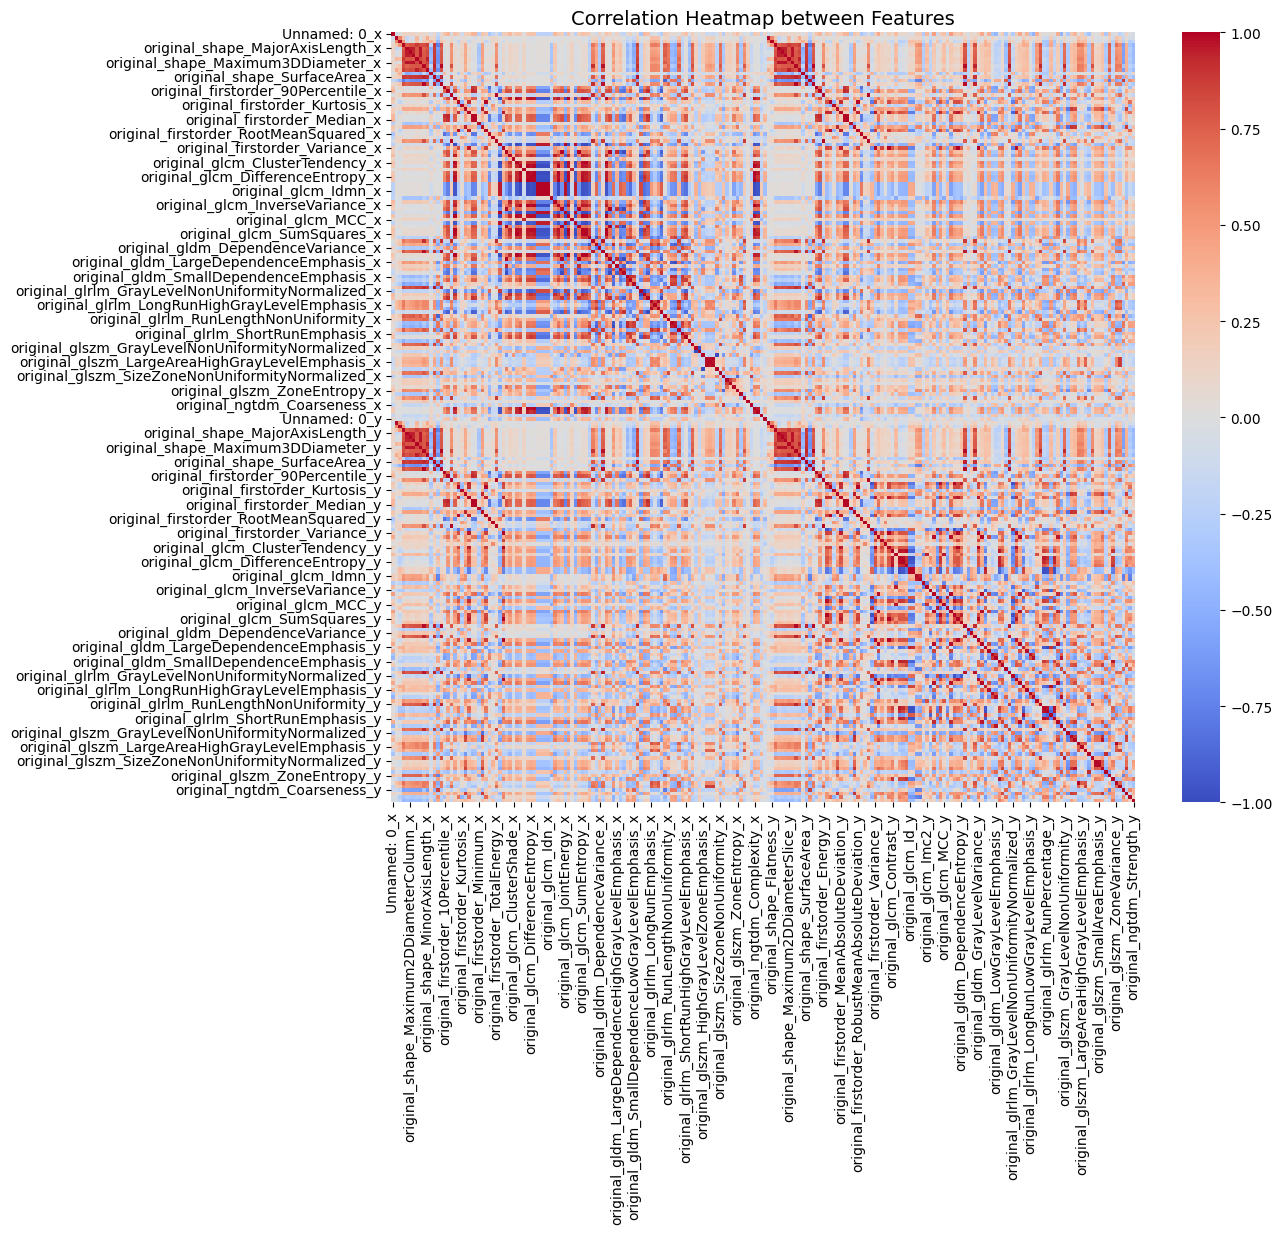

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True)

# Reset index to include 'PatientID' as a regular column
merged_data.reset_index(inplace=True)

# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations for numeric columns
correlation_matrix = merged_data[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap between Features',fontsize = 14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()


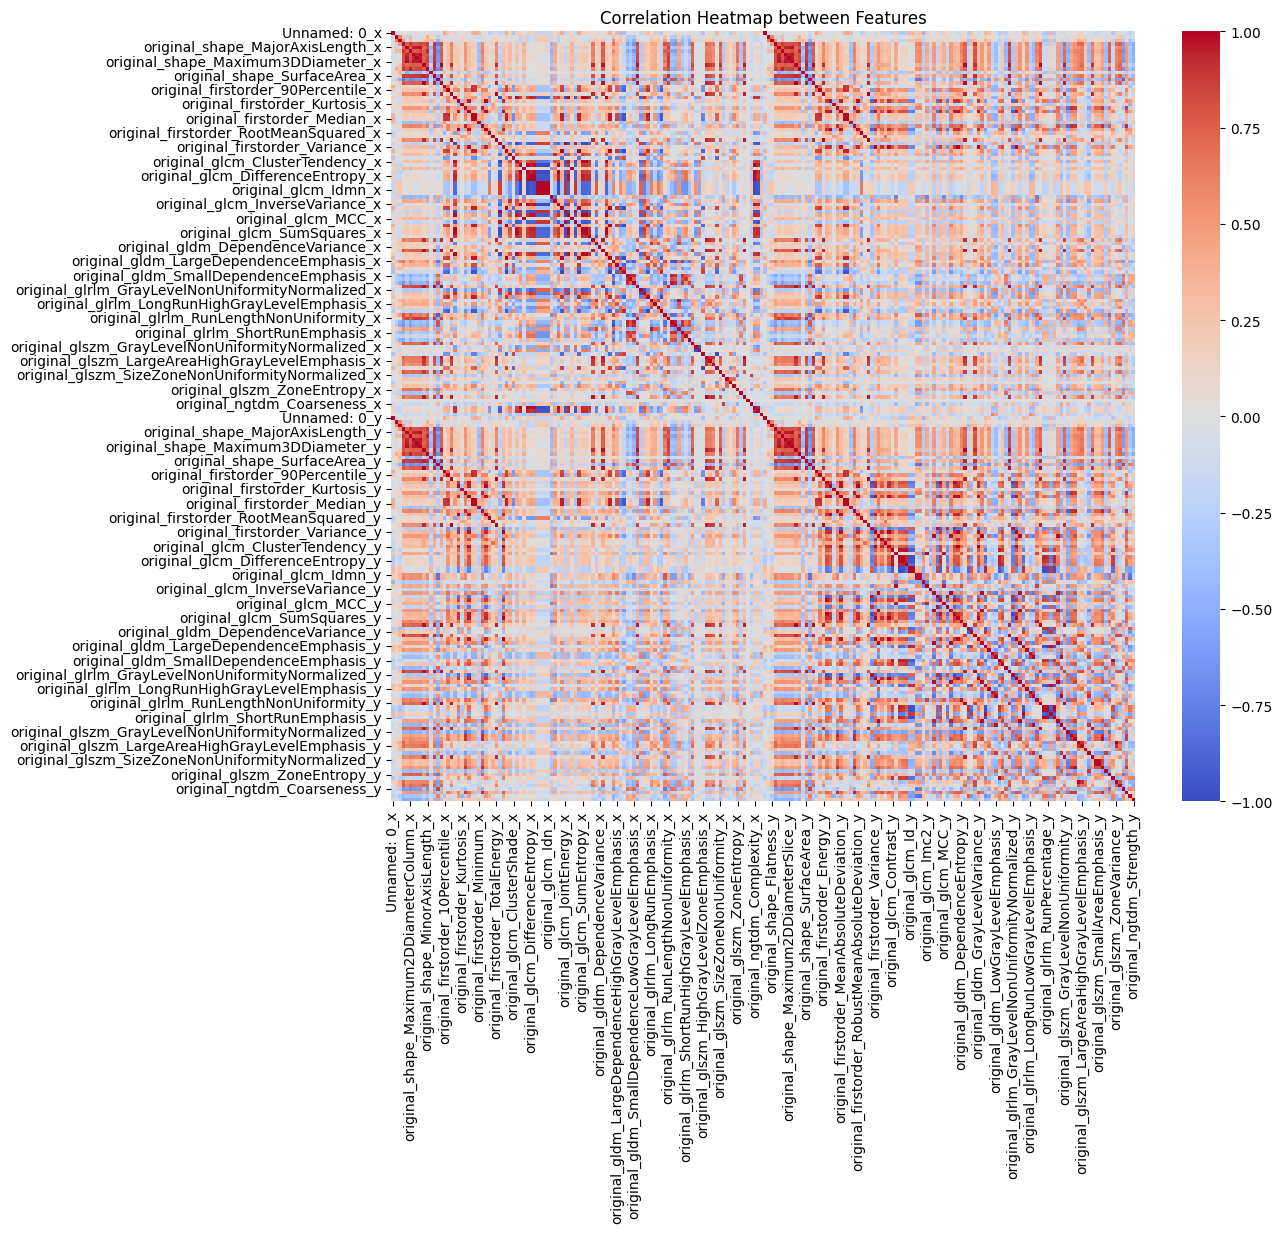

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t2_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t2_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True)

# Reset index to include 'PatientID' as a regular column
merged_data.reset_index(inplace=True)

# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations for numeric columns
correlation_matrix = merged_data[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap between Features')
plt.show()


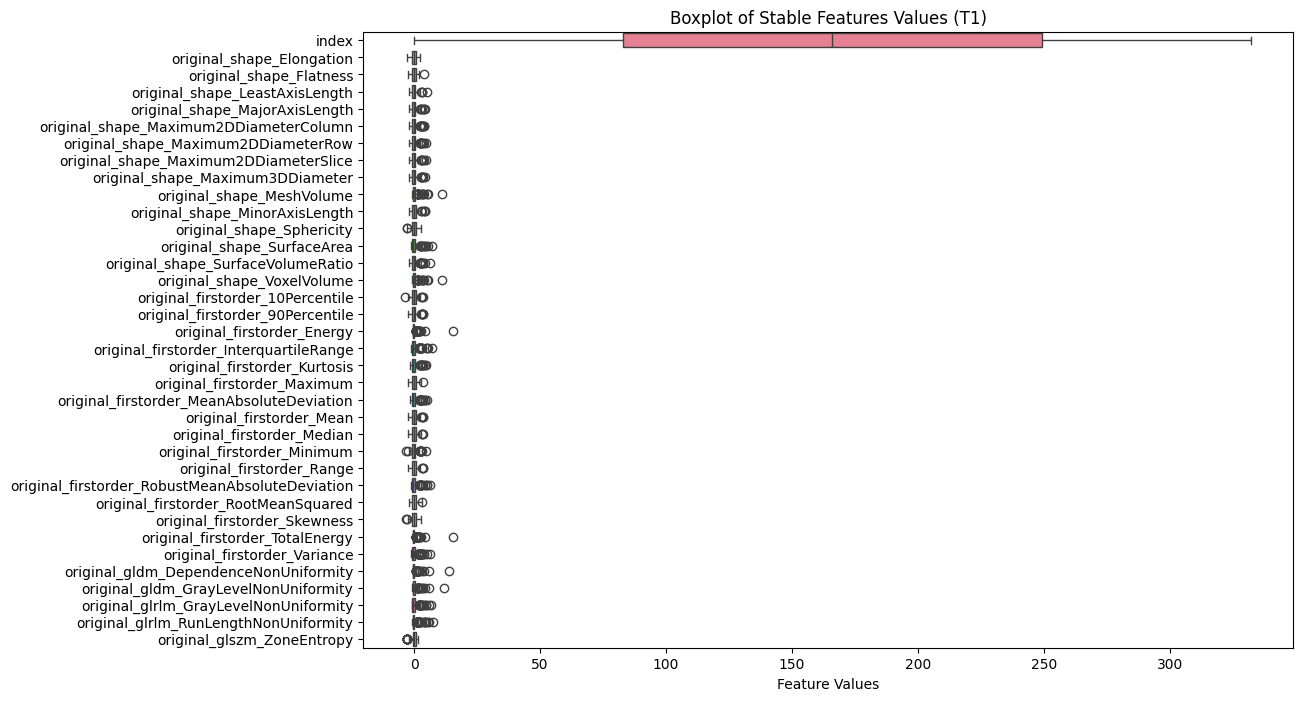

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing stable features' values
stable_features_csv ='/Intern Programming/data/output/stabled_radiomics_features_t1.csv'
stable_features_data = pd.read_csv(stable_features_csv)

# Remove 'PatientID' column for visualization if present
if 'PatientID' in stable_features_data.columns:
    stable_features_data = stable_features_data.drop(columns=['PatientID'])

# Plotting boxplots for each stable feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=stable_features_data, orient='h')
plt.title('Boxplot of Stable Features Values (T1)')
plt.xlabel('Feature Values')

plt.show()


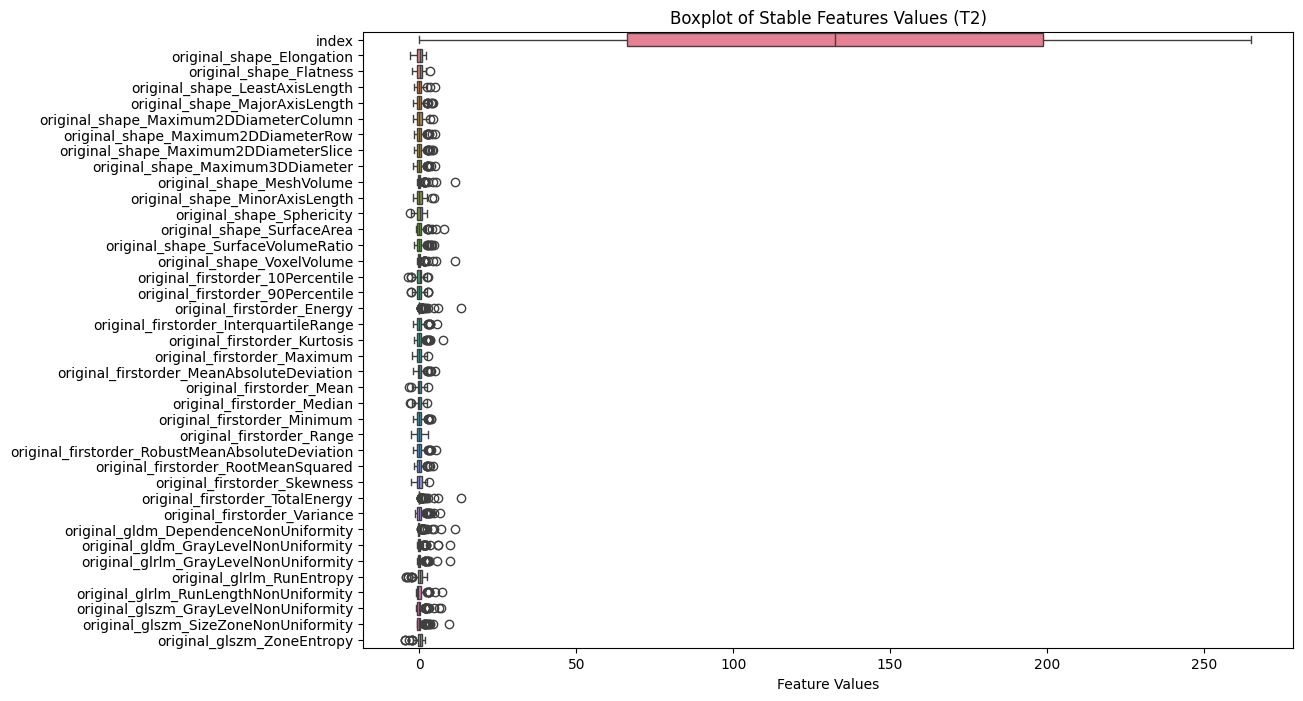

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing stable features' values
stable_features_csv ='/Intern Programming/data/output/stabled_radiomics_features_t2.csv'
stable_features_data = pd.read_csv(stable_features_csv)

# Remove 'PatientID' column for visualization if present
if 'PatientID' in stable_features_data.columns:
    stable_features_data = stable_features_data.drop(columns=['PatientID'])

# Plotting boxplots for each stable feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=stable_features_data, orient='h')
plt.title('Boxplot of Stable Features Values (T2)')
plt.xlabel('Feature Values')
plt.show()



C:\Users\SAM\AppData\Local\Temp\ipykernel_4388\1763079873.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Value', data=melted_data, palette=palette, showfliers=False)


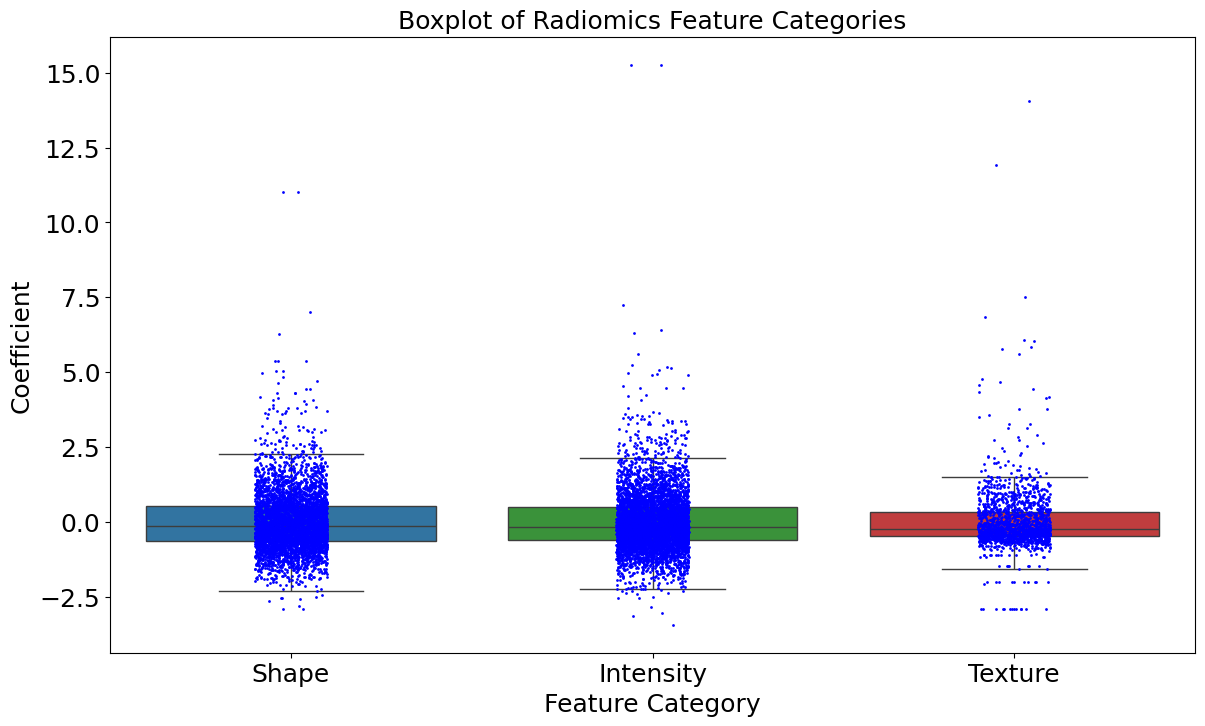

In [69]:
## Code for only stabled features t1

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Intern Programming/data/output/stabled_radiomics_features_t1.csv', index_col='PatientID')




# Function to categorize feature types
def categorize_feature(column):
    if column.startswith("original_shape"):
        return "Shape"
    elif column.startswith("original_firstorder"):
        return "Intensity"
    elif (column.startswith("original_gldm") or 
          column.startswith("original_glrlm") or 
          column.startswith("original_glszm")):
        return "Texture"
    else:
        return "Other"

# Apply categorization
categories = {col: categorize_feature(col) for col in data.columns}

# Melt the DataFrame
melted_data = data.reset_index().melt(id_vars='PatientID', var_name='Feature', value_name='Value')

# Map the categories
melted_data['Category'] = melted_data['Feature'].map(categories)

# Filter melted data to include only 'Shape', 'Intensity', and 'Texture'
melted_data = melted_data[melted_data['Category'].isin(['Shape', 'Intensity', 'Texture'])]

palette = {
    "Shape": "#1f77b4",   # blue
    "Intensity": "#2ca02c",  # green
    "Texture": "#d62728",   # red
    
}

# Plotting the boxplots for each feature category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Value', data=melted_data, palette=palette, showfliers=False)
sns.stripplot(x='Category', y='Value', data=melted_data, color='blue', jitter=True, size=2)
plt.title('Boxplot of Radiomics Feature Categories', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Feature Category',fontsize = 18)
plt.ylabel('Coefficient',fontsize = 18)
plt.show()










C:\Users\SAM\AppData\Local\Temp\ipykernel_4388\3923822853.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Value', data=melted_data, palette=palette, showfliers=False)


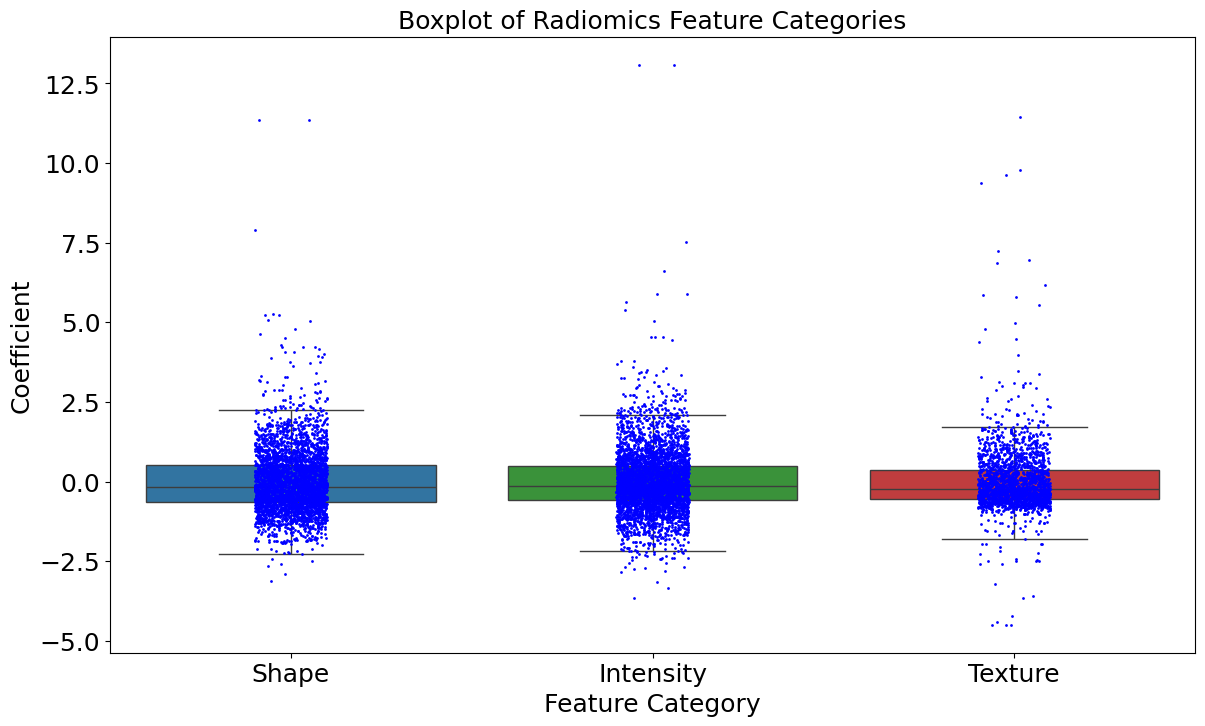

In [70]:
## Code for only stabled features t2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Intern Programming/data/output/stabled_radiomics_features_t2.csv', index_col='PatientID')




# Function to categorize feature types
def categorize_feature(column):
    if column.startswith("original_shape"):
        return "Shape"
    elif column.startswith("original_firstorder"):
        return "Intensity"
    elif (column.startswith("original_gldm") or 
          column.startswith("original_glrlm") or 
          column.startswith("original_glszm")):
        return "Texture"
    else:
        return "Other"

# Apply categorization
categories = {col: categorize_feature(col) for col in data.columns}

# Melt the DataFrame
melted_data = data.reset_index().melt(id_vars='PatientID', var_name='Feature', value_name='Value')

# Map the categories
melted_data['Category'] = melted_data['Feature'].map(categories)

# Filter melted data to include only 'Shape', 'Intensity', and 'Texture'
melted_data = melted_data[melted_data['Category'].isin(['Shape', 'Intensity', 'Texture'])]



palette = {
    "Shape": "#1f77b4",   # blue
    "Intensity": "#2ca02c",  # green
    "Texture": "#d62728",   # red
    
}

# Plotting the boxplots for each feature category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Value', data=melted_data, palette=palette, showfliers=False)
sns.stripplot(x='Category', y='Value', data=melted_data, color='blue', jitter=True, size=2)
plt.title('Boxplot of Radiomics Feature Categories', fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xlabel('Feature Category',fontsize = 18)
plt.ylabel('Coefficient',fontsize = 18)
plt.show()










C:\Users\SAM\AppData\Local\Temp\ipykernel_4388\3541600971.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Value', data=melted_data, palette='Set2', showfliers=False)


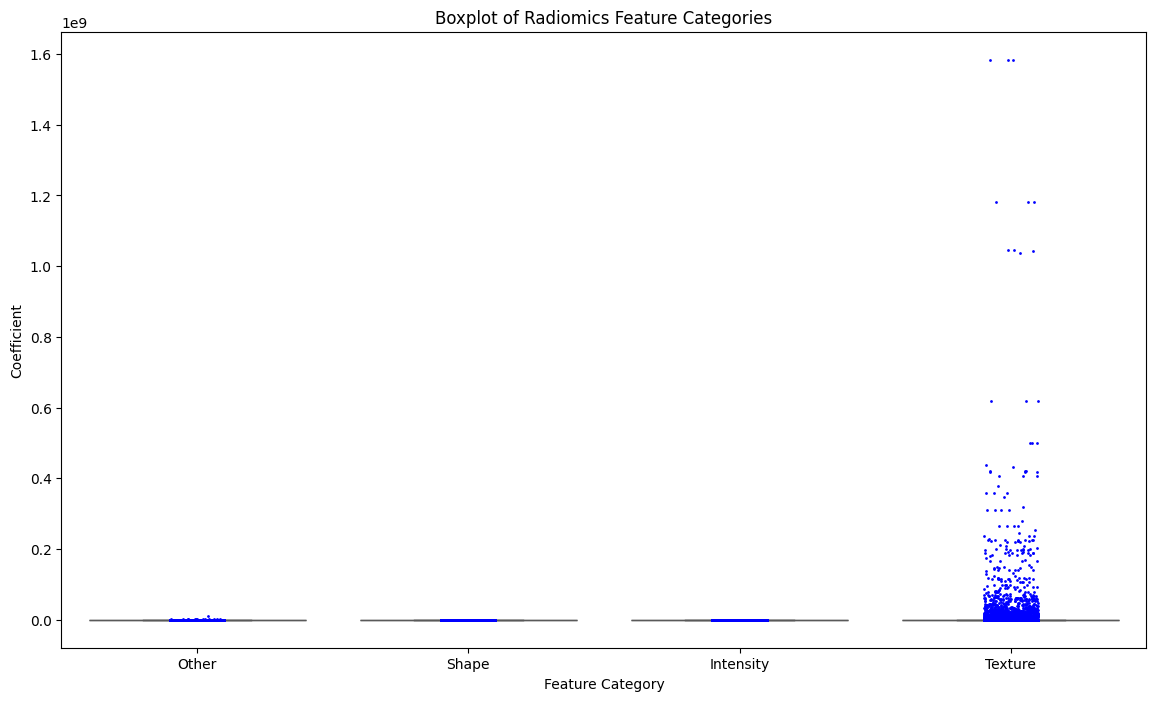

In [40]:
## code for all fetures

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT.csv', index_col='PatientID')

# Remove diagnostic columns
columns_to_remove = [col for col in data.columns if col.startswith('diagnostics')]
data = data.drop(columns=columns_to_remove)

# Function to categorize feature types
def categorize_feature(column):
    if column.startswith("original_shape"):
        return "Shape"
    elif column.startswith("original_firstorder"):
        return "Intensity"
    elif (column.startswith("original_gldm") or 
          column.startswith("original_glrlm") or 
          column.startswith("original_glszm")):
        return "Texture"
    else:
        return "Other"

# Apply categorization
categories = {col: categorize_feature(col) for col in data.columns}

# Melt the DataFrame without 'PatientID' and 'index'
melted_data = data.reset_index().melt(id_vars=['PatientID'], var_name='Feature', value_name='Value')

# Map the categories
melted_data['Category'] = melted_data['Feature'].map(categories)

# Plotting the boxplots for each feature category
plt.figure(figsize=(14, 8))
sns.boxplot(x='Category', y='Value', data=melted_data, palette='Set2', showfliers=False)
sns.stripplot(x='Category', y='Value', data=melted_data, color='blue', jitter=True, size=2)
plt.title('Boxplot of Radiomics Feature Categories')
plt.xlabel('Feature Category')
plt.ylabel('Coefficient')
plt.show()



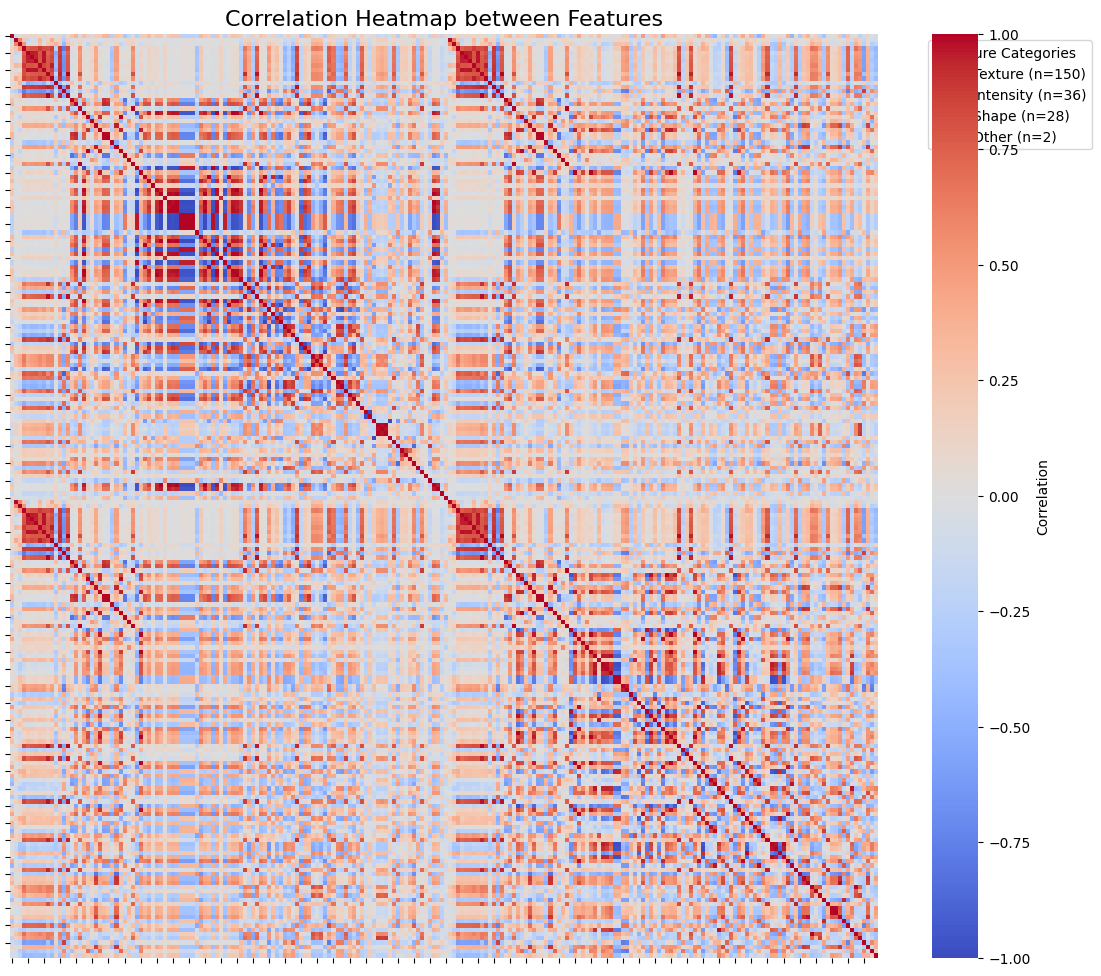

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True, suffixes=('_0mm', '_1mm'))

# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations for numeric columns
correlation_matrix = merged_data[numeric_columns].corr()

# Function to categorize feature types
def categorize_feature(column):
    if "shape" in column:
        return "Shape"
    elif "firstorder" in column:
        return "Intensity"
    elif any(x in column for x in ["gldm", "glrlm", "glcm", "ngtdm", "glszm"]):
        return "Texture"
    else:
        return "Other"

# Apply the function to categorize features
feature_categories = numeric_columns.map(categorize_feature)

# Create a DataFrame for the categories
categories_df = pd.DataFrame({'Feature': numeric_columns, 'Category': feature_categories})

# Count the number of features per category
category_counts = categories_df['Category'].value_counts().to_dict()

# Create a color palette for the categories
palette = {
    "Shape": "#1f77b4",   # blue
    "Intensity": "#2ca02c",  # green
    "Texture": "#d62728",   # red
    "Other": "#ff7f0e"    # orange
}

# Generate a color list for the heatmap sidebar
category_colors = categories_df['Category'].map(palette)

# Plot heatmap with the sidebar
plt.figure(figsize=(14, 12))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap between Features', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=8)

# Remove feature names from axes
ax.set_xticklabels([])
ax.set_yticklabels([])

# Create a custom legend
handles = [Patch(facecolor=palette[name], label=f"{name} (n={count})") for name, count in category_counts.items()]
plt.legend(handles=handles, title='Feature Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

 



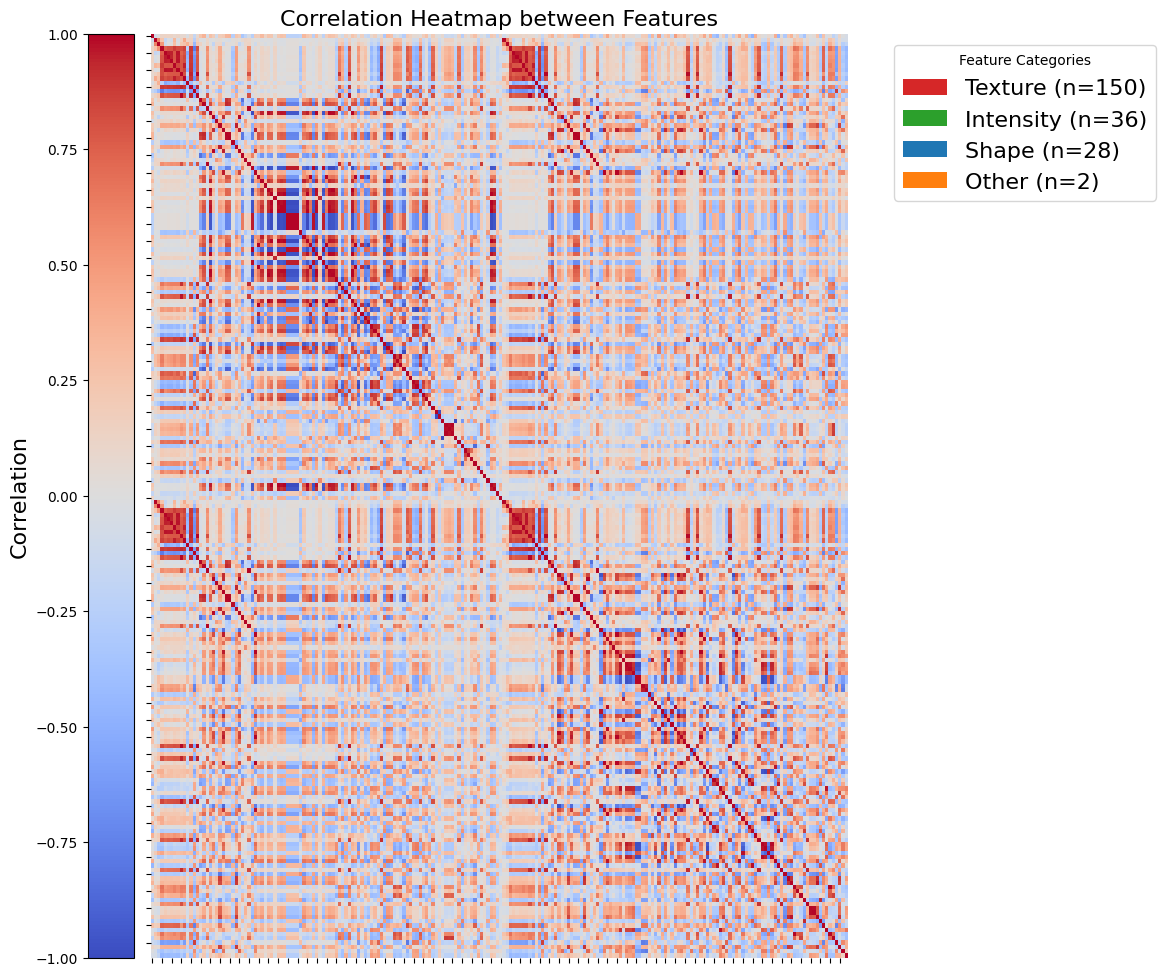

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True, suffixes=('_0mm', '_1mm'))

# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlations for numeric columns
correlation_matrix = merged_data[numeric_columns].corr()

# Function to categorize feature types
def categorize_feature(column):
    if "shape" in column:
        return "Shape"
    elif "firstorder" in column:
        return "Intensity"
    elif any(x in column for x in ["gldm", "glrlm", "glcm", "ngtdm", "glszm"]):
        return "Texture"
    else:
        return "Other"

# Apply the function to categorize features
feature_categories = numeric_columns.map(categorize_feature)

# Create a DataFrame for the categories
categories_df = pd.DataFrame({'Feature': numeric_columns, 'Category': feature_categories})

# Count the number of features per category
category_counts = categories_df['Category'].value_counts().to_dict()

# Create a color palette for the categories
palette = {
    "Shape": "#1f77b4",   # blue
    "Intensity": "#2ca02c",  # green
    "Texture": "#d62728",   # red
    "Other": "#ff7f0e"    # orange
}

# Generate a color list for the heatmap sidebar
category_colors = categories_df['Category'].map(palette).tolist()

# Plot heatmap with the sidebar
plt.figure(figsize=(14, 12))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar=False)
plt.title('Correlation Heatmap between Features', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

# Remove feature names from axes
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add the color bar on the left
cbar = plt.colorbar(ax.collections[0], ax=ax, location='left', pad=0.02)
cbar.set_label('Correlation',fontsize = 16)

# Create a custom legend
handles = [Patch(facecolor=palette[name], label=f"{name} (n={count})") for name, count in category_counts.items()]
plt.legend(handles=handles, title='Feature Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Adjust layout to make room for the legend
plt.subplots_adjust(left=0.2, right=0.8)

plt.show()


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the two datasets
data_0mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_normalized.csv')
data_1mm = pd.read_csv('/Intern Programming/data/output/umcg_radiomicsfeature_t1_GTVPT_1mm_normalized.csv')

# Set 'PatientID' as index
data_0mm.set_index('PatientID', inplace=True)
data_1mm.set_index('PatientID', inplace=True)

# Merge datasets based on PatientID or any common identifier
merged_data = pd.merge(data_0mm, data_1mm, left_index=True, right_index=True, suffixes=('_0mm', '_1mm'))

# Select only numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Function to categorize feature types
def categorize_feature(column):
    if "shape" in column:
        return "Shape"
    elif "firstorder" in column:
        return "Intensity"
    elif any(x in column for x in ["gldm", "glrlm", "glcm", "ngtdm", "glszm"]):
        return "Texture"
    else:
        return "Other"

# Assume you have already defined the 'palette' dictionary

# Create a DataFrame to hold feature categories and their counts
category_counts = pd.DataFrame(index=numeric_columns, columns=['Category'])
category_counts['Category'] = category_counts.index.map(categorize_feature)

# Convert category labels to color codes
category_colors = category_counts['Category'].map(palette)

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(category_colors.to_frame().T, annot=False, cbar=False, xticklabels=False, yticklabels=False)
plt.show()


ValueError: could not convert string to float: '#ff7f0e'

<Figure size 800x600 with 0 Axes>